### Downloading And Exploration Of Data

In [1]:
import pandas as pd

In [2]:
raw_df=pd.read_csv('insurance.csv')

In [3]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1]:
# As we can see there aren't any null values in the dataset

In [6]:
raw_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
unique_values(raw_df)

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='charges', ylabel='Count'>

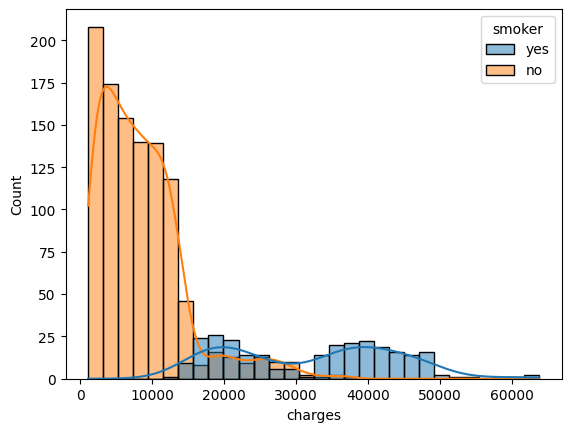

In [10]:
sns.histplot(data=raw_df,x='charges',kde=True,hue='smoker')

<Axes: xlabel='charges', ylabel='Count'>

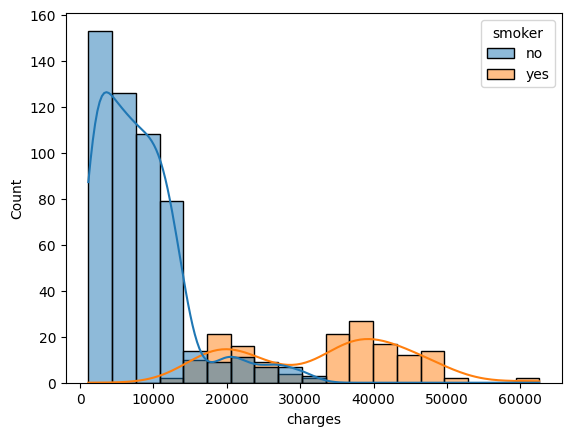

In [12]:
sns.histplot(data=raw_df[raw_df.sex=='male'],x='charges',kde=True,hue='smoker')

<Axes: xlabel='charges', ylabel='Count'>

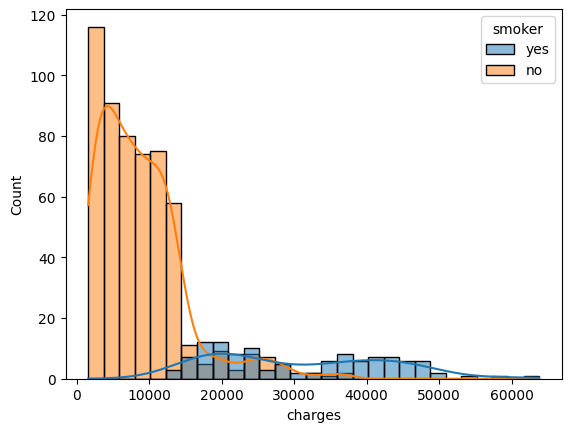

In [13]:
sns.histplot(data=raw_df[raw_df.sex=='female'],x='charges',kde=True,hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

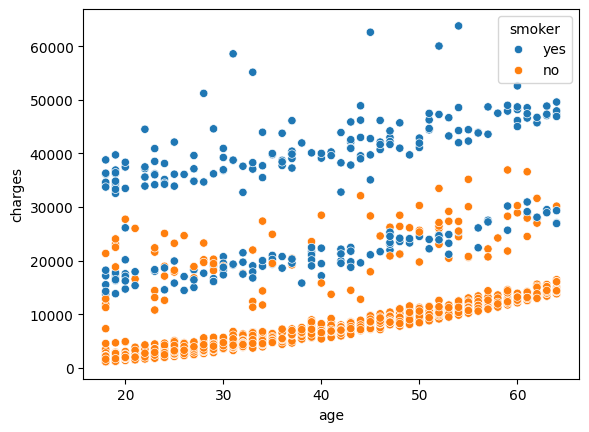

In [19]:
sns.scatterplot(x=raw_df['age'],y=raw_df['charges'],hue=raw_df['smoker'])

#### From scatterplot we can conclude that people who are aged and smoke had to pay more charges than people who do not smoke.
#### We can conclude that people who are younger had to pay less than people who are aged.
#### We can conclude that younger people who smoke had to pay more charges than younger people who do not smoke.

<Axes: xlabel='bmi', ylabel='charges'>

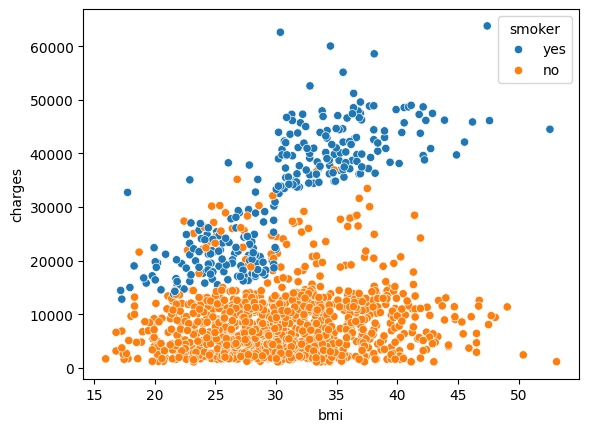

In [41]:
sns.scatterplot(x=raw_df['bmi'],y=raw_df['charges'],hue=raw_df['smoker'])

In [22]:
numeric_df = raw_df.select_dtypes(include='number')
numeric_df['region'] = raw_df['region']
region_group = numeric_df.groupby('region').mean()

In [27]:
region_group

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [31]:
region_group.index

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object', name='region')

In [28]:
region_group['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Text(0, 0.5, 'charges')

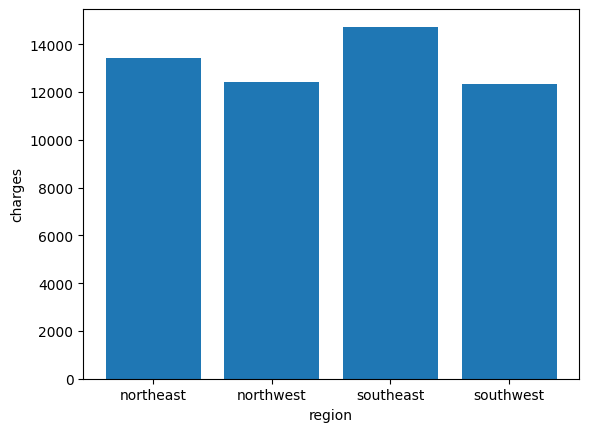

In [36]:
plt.bar(x=region_group.index,height=region_group['charges'])
plt.xlabel('region')
plt.ylabel('charges')

In [38]:
numeric1_df = raw_df.select_dtypes(include='number')
numeric1_df['children'] = raw_df['children']
children_group = numeric1_df.groupby('children').mean()
children_group

,age,bmi,charges
children,,,
0,38.444251,30.550296,12365.975602
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


Text(0, 0.5, 'charges')

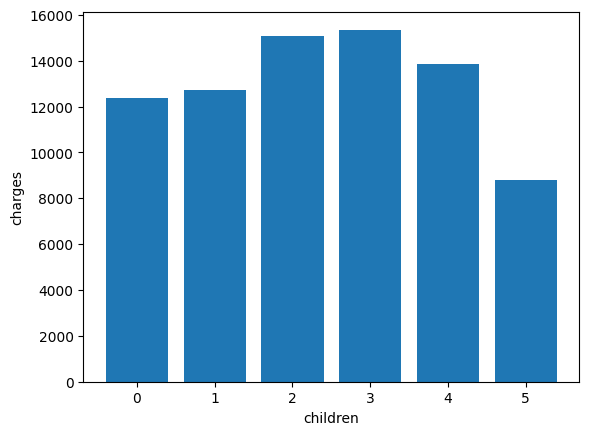

In [40]:
plt.bar(x=children_group.index,height=children_group['charges'])
plt.xlabel('children')
plt.ylabel('charges')

In [43]:
dict1={'no':0,'yes':1}
dict2={'male':1,'female':0}
dict3={'southeast':1,'southwest':2,'northwest':3,'northeast':4}
raw_df['smoker']=raw_df.smoker.map(dict1)
raw_df['sex']=raw_df.sex.map(dict2)
raw_df['region']=raw_df.region.map(dict3)

In [44]:
raw_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


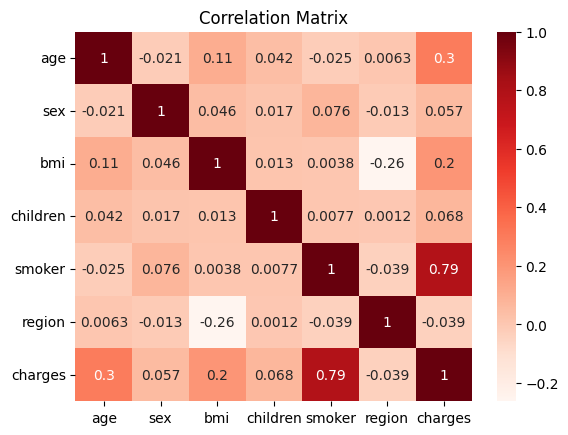

In [45]:
sns.heatmap(raw_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

#### From the heatmap we can conclude that smoker is positively related to charges.
#### We can conclude BMI and age also affect the charges positively but not very strongly.
#### we can conclude children,region and sex has very small affect on charges.